In [4]:
import json
import re
import os
import matplotlib.pyplot as plt
import numpy as np

def analyze_ga_logs(log_directory="."):
    """
    Analyzes genetic algorithm log files (gen_X.txt) in a given directory.

    Calculates min, max, and average fitness for each generation and
    generates separate plots for each metric, saving them to .png files.
    """
    
    # Find all 'gen_X.txt' files in the specified directory
    log_files = []
    for f in os.listdir(log_directory):
        if re.match(r'gen_(\d+)\.txt$', f):
            log_files.append(f)
            
    if not log_files:
        print(f"Error: No 'gen_X.txt' files found in directory '{log_directory}'.")
        print("Please make sure your log files are in the same directory as this script or the specified path.")
        return

    # Sort files by generation number
    log_files.sort(key=lambda f: int(re.search(r'gen_(\d+)\.txt$', f).group(1)))

    generations = []
    max_fitnesses = []
    avg_fitnesses = []
    min_fitnesses = []

    print("--- Genetic Algorithm Fitness Analysis ---")
    print(f"Found {len(log_files)} log files: {', '.join(log_files)}")
    print("\n" + "="*60)
    print(f"{'Generation':<12} | {'Max Fitness':<15} | {'Avg Fitness':<15} | {'Min Fitness':<15}")
    print("-" * 60)

    for log_file in log_files:
        try:
            # Extract generation number
            gen_num_match = re.search(r'gen_(\d+)\.txt$', log_file)
            if not gen_num_match:
                continue
            gen_num = int(gen_num_match.group(1))

            # Read the content of the file
            with open(os.path.join(log_directory, log_file), 'r') as f:
                content = f.read()

            # Parse the JSON-like content
            data = json.loads(content)

            # Extract all fitness values from the dictionary
            current_gen_fitnesses = []
            for key, value in data.items():
                # Match keys like 'fitness_0', 'fitness_1', 'fitness_lis_0', etc.
                if re.match(r'fitness(?:_lis)?_\d+', key):
                    if isinstance(value, (int, float)):
                        current_gen_fitnesses.append(value)
            
            if not current_gen_fitnesses:
                print(f"Warning: No fitness data found in {log_file}.")
                continue

            # Calculate stats
            max_fit = np.max(current_gen_fitnesses)
            avg_fit = np.mean(current_gen_fitnesses)
            min_fit = np.min(current_gen_fitnesses)

            # Store stats
            generations.append(gen_num)
            max_fitnesses.append(max_fit)
            avg_fitnesses.append(avg_fit)
            min_fitnesses.append(min_fit)

            # Print table row
            print(f"{gen_num:<12} | {max_fit:<15.4f} | {avg_fit:<15.4f} | {min_fit:<15.4f}")

        except json.JSONDecodeError:
            print(f"Error: Could not parse JSON in {log_file}.")
        except FileNotFoundError:
            print(f"Error: File not found {log_file}.")
        except Exception as e:
            print(f"An error occurred processing {log_file}: {e}")

    # --- Plotting (Modified Section) ---
    if not generations:
        print("\nNo data to plot.")
        return

    try:
        plot_size = (24, 9) # Define a standard size for the plots

        # --- Plot 1: Max Fitness ---
        plt.figure(figsize=plot_size)
        plt.plot(generations, max_fitnesses, marker='o', linestyle='-', label='Max Fitness', color='blue')
        plt.title('Max Fitness Over Generations', fontsize=16)
        plt.xlabel('Generation', fontsize=12)
        plt.ylabel('Fitness Score', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True)
        plt.xticks(generations)
        plot_filename_max = 'max_fitness_over_generations.png'
        plt.savefig(plot_filename_max)
        plt.close() # Close the figure to free memory
        print(f"\nSuccessfully generated plot: {plot_filename_max}")

        # --- Plot 2: Average Fitness ---
        plt.figure(figsize=plot_size)
        plt.plot(generations, avg_fitnesses, marker='s', linestyle='--', label='Average Fitness', color='green')
        plt.title('Average Fitness Over Generations', fontsize=16)
        plt.xlabel('Generation', fontsize=12)
        plt.ylabel('Fitness Score', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True)
        plt.xticks(generations)
        plot_filename_avg = 'avg_fitness_over_generations.png'
        plt.savefig(plot_filename_avg)
        plt.close() # Close the figure
        print(f"Successfully generated plot: {plot_filename_avg}")

        # --- Plot 3: Min Fitness ---
        plt.figure(figsize=plot_size)
        plt.plot(generations, min_fitnesses, marker='x', linestyle=':', label='Min Fitness', color='red')
        plt.title('Min Fitness Over Generations', fontsize=16)
        plt.xlabel('Generation', fontsize=12)
        plt.ylabel('Fitness Score', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True)
        plt.xticks(generations)
        plot_filename_min = 'min_fitness_over_generations.png'
        plt.savefig(plot_filename_min)
        plt.close() # Close the figure
        print(f"Successfully generated plot: {plot_filename_min}")
        
        print("\n" + "="*60)
        print("All plots generated successfully.")


    except Exception as e:
        print(f"\nAn error occurred while generating the plots: {e}")

if __name__ == "__main__":
    # Assumes the log files are in the specified directory
    # PLEASE UPDATE THIS PATH if it's incorrect
    analyze_ga_logs(log_directory="C:\\Users\\zghazal\\pafot-main\\Output\\2025-11-04-13-01-08")

--- Genetic Algorithm Fitness Analysis ---
Found 92 log files: gen_0.txt, gen_1.txt, gen_2.txt, gen_3.txt, gen_4.txt, gen_5.txt, gen_6.txt, gen_7.txt, gen_8.txt, gen_9.txt, gen_10.txt, gen_11.txt, gen_12.txt, gen_13.txt, gen_14.txt, gen_15.txt, gen_16.txt, gen_17.txt, gen_18.txt, gen_19.txt, gen_20.txt, gen_21.txt, gen_22.txt, gen_23.txt, gen_24.txt, gen_25.txt, gen_26.txt, gen_27.txt, gen_28.txt, gen_29.txt, gen_30.txt, gen_31.txt, gen_32.txt, gen_33.txt, gen_34.txt, gen_35.txt, gen_36.txt, gen_37.txt, gen_38.txt, gen_39.txt, gen_40.txt, gen_41.txt, gen_42.txt, gen_43.txt, gen_44.txt, gen_45.txt, gen_46.txt, gen_47.txt, gen_48.txt, gen_49.txt, gen_50.txt, gen_51.txt, gen_52.txt, gen_53.txt, gen_54.txt, gen_55.txt, gen_56.txt, gen_57.txt, gen_58.txt, gen_59.txt, gen_60.txt, gen_61.txt, gen_62.txt, gen_63.txt, gen_64.txt, gen_65.txt, gen_66.txt, gen_67.txt, gen_68.txt, gen_69.txt, gen_70.txt, gen_71.txt, gen_72.txt, gen_73.txt, gen_74.txt, gen_75.txt, gen_76.txt, gen_77.txt, gen_78.txt,

In [ ]:
## Create separate plot for min, max, avg fitness

plt.plot(generations, max_fitnesses, marker='o', linestyle='-', label='Max Fitness')
plt.plot(generations, avg_fitnesses, marker='s', linestyle='--', label='Average Fitness')
plt.plot(generations, min_fitnesses, marker='x', linestyle=':', label='Min Fitness')

In [5]:
import json
import re
import os
import pandas as pd

def create_ga_dataframe(log_directory="."):
    """
    Parses all 'gen_X.txt' log files in a directory into a single Pandas DataFrame.

    Each row in the DataFrame represents one individual from one generation.
    """
    
    # Find all 'gen_X.txt' files
    log_files = []
    for f in os.listdir(log_directory):
        match = re.match(r'gen_(\d+)\.txt$', f)
        if match:
            # Store tuple of (filename, gen_number)
            log_files.append((f, int(match.group(1))))
            
    if not log_files:
        print(f"Error: No 'gen_X.txt' files found in directory '{log_directory}'.")
        print("Please make sure your log files are in the same directory as this script.")
        return None

    # Sort files by generation number
    log_files.sort(key=lambda x: x[1])

    all_individuals_data = [] # List to store row dictionaries

    print("--- Parsing GA Logs into DataFrame ---")
    
    for log_file, gen_num in log_files:
        file_path = os.path.join(log_directory, log_file)
        print(f"Processing {log_file} (Generation {gen_num})...")
        
        try:
            with open(file_path, 'r') as f:
                content = f.read()
            
            data = json.loads(content)

            # Find all fitness keys to identify individuals
            for key, fitness_value in data.items():
                # Match keys like 'fitness_0', 'fitness_1', 'fitness_lis_0', etc.
                match = re.match(r'^(fitness(?:_lis)?)_(\d+)$', key)
                
                if match:
                    prefix = match.group(1) # 'fitness' or 'fitness_lis'
                    individual_id = match.group(2) # '0', '1', ...
                    
                    # Construct the corresponding population key
                    # Replaces 'fitness' with 'pop' -> 'pop_0'
                    # Replaces 'fitness_lis' with 'pop_lis' -> 'pop_lis_0'
                    pop_prefix = prefix.replace("fitness", "pop")
                    pop_key = f"{pop_prefix}_{individual_id}"
                    
                    if pop_key in data:
                        population_data = data[pop_key]
                        
                        # Add data for this individual to our list
                        all_individuals_data.append({
                            "generation": gen_num,
                            "individual_id": int(individual_id),
                            "fitness": fitness_value,
                            # Store the raw population data object.
                            # When saved to CSV, this will become a string.
                            "population_data": population_data 
                        })
                    else:
                        print(f"  Warning: Found {key} but no matching {pop_key} in {log_file}.")

        except json.JSONDecodeError:
            print(f"  Error: Could not parse JSON in {log_file}.")
        except FileNotFoundError:
            print(f"  Error: File not found {file_path}.")
        except Exception as e:
            print(f"  An error occurred processing {log_file}: {e}")

    if not all_individuals_data:
        print("No data was parsed. Cannot create DataFrame.")
        return None

    # Create the DataFrame from our list of dictionaries
    df = pd.DataFrame(all_individuals_data)
    
    # Reorder columns for clarity
    if not df.empty:
        df = df[['generation', 'individual_id', 'fitness', 'population_data']]
    
    return df

if __name__ == "__main__":
    # Assumes the log files are in the same directory as the script
    ga_df = create_ga_dataframe(log_directory="C:\\Users\\zghazal\\pafot-main\\Output\\2025-11-04-13-01-08")
    
    if ga_df is not None:
        print("\n" + "="*40)
        print("Successfully created DataFrame:")
        print(ga_df.head())
        
        print("\nDataFrame Info:")
        ga_df.info()
        
        # Save to CSV
        output_filename = 'ga_all_generations.csv'
        try:
            ga_df.to_csv(output_filename, index=False)
            print(f"\nDataFrame saved to {output_filename}")
        except Exception as e:
            print(f"\nAn error occurred while saving to CSV: {e}")

--- Parsing GA Logs into DataFrame ---
Processing gen_0.txt (Generation 0)...
Processing gen_1.txt (Generation 1)...
Processing gen_2.txt (Generation 2)...
Processing gen_3.txt (Generation 3)...
Processing gen_4.txt (Generation 4)...
Processing gen_5.txt (Generation 5)...
Processing gen_6.txt (Generation 6)...
Processing gen_7.txt (Generation 7)...
Processing gen_8.txt (Generation 8)...
Processing gen_9.txt (Generation 9)...
Processing gen_10.txt (Generation 10)...
Processing gen_11.txt (Generation 11)...
Processing gen_12.txt (Generation 12)...
Processing gen_13.txt (Generation 13)...
Processing gen_14.txt (Generation 14)...
Processing gen_15.txt (Generation 15)...
Processing gen_16.txt (Generation 16)...
Processing gen_17.txt (Generation 17)...
Processing gen_18.txt (Generation 18)...
Processing gen_19.txt (Generation 19)...
Processing gen_20.txt (Generation 20)...
Processing gen_21.txt (Generation 21)...
Processing gen_22.txt (Generation 22)...
Processing gen_23.txt (Generation 23).

<Axes: title={'center': 'Fitness of Individual 7 Over Generations'}, xlabel='generation'>

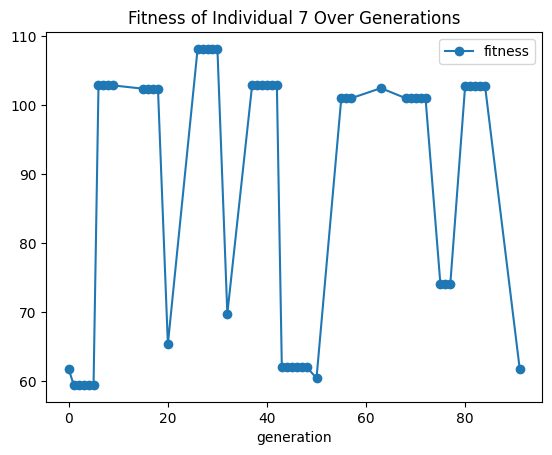

In [11]:
## analyze the data

## Plot the fitness over individual id (7)
ga_df[ga_df['individual_id'] == 7].plot(x='generation', y='fitness', title='Fitness of Individual 7 Over Generations', marker='o')

